# Car Price Prediction


### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Steps which we will follow
1. Reading, understanding and visualising the data
2. Preparing data modeling (train-test split, rescaling etc.)
3. Training Model
4. Residual analysis
5. Prediction and evaluation on the test data

## Steps 1: Reading the understanding the data

In [102]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score 

%matplotlib inline
pd.set_option('display.max_columns', 40)

filePath = "C:\\Users\sumit\\AI & ML UpGrad\\Machine Learning 1\\Linear Regression Assignment\\"

In [104]:
# read the data 
cars = pd.read_csv(filePath + 'CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [105]:
cars.shape

(205, 26)

In [106]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Check to see that can we apply Linear Regression on below data or not

<Figure size 1800x1080 with 0 Axes>

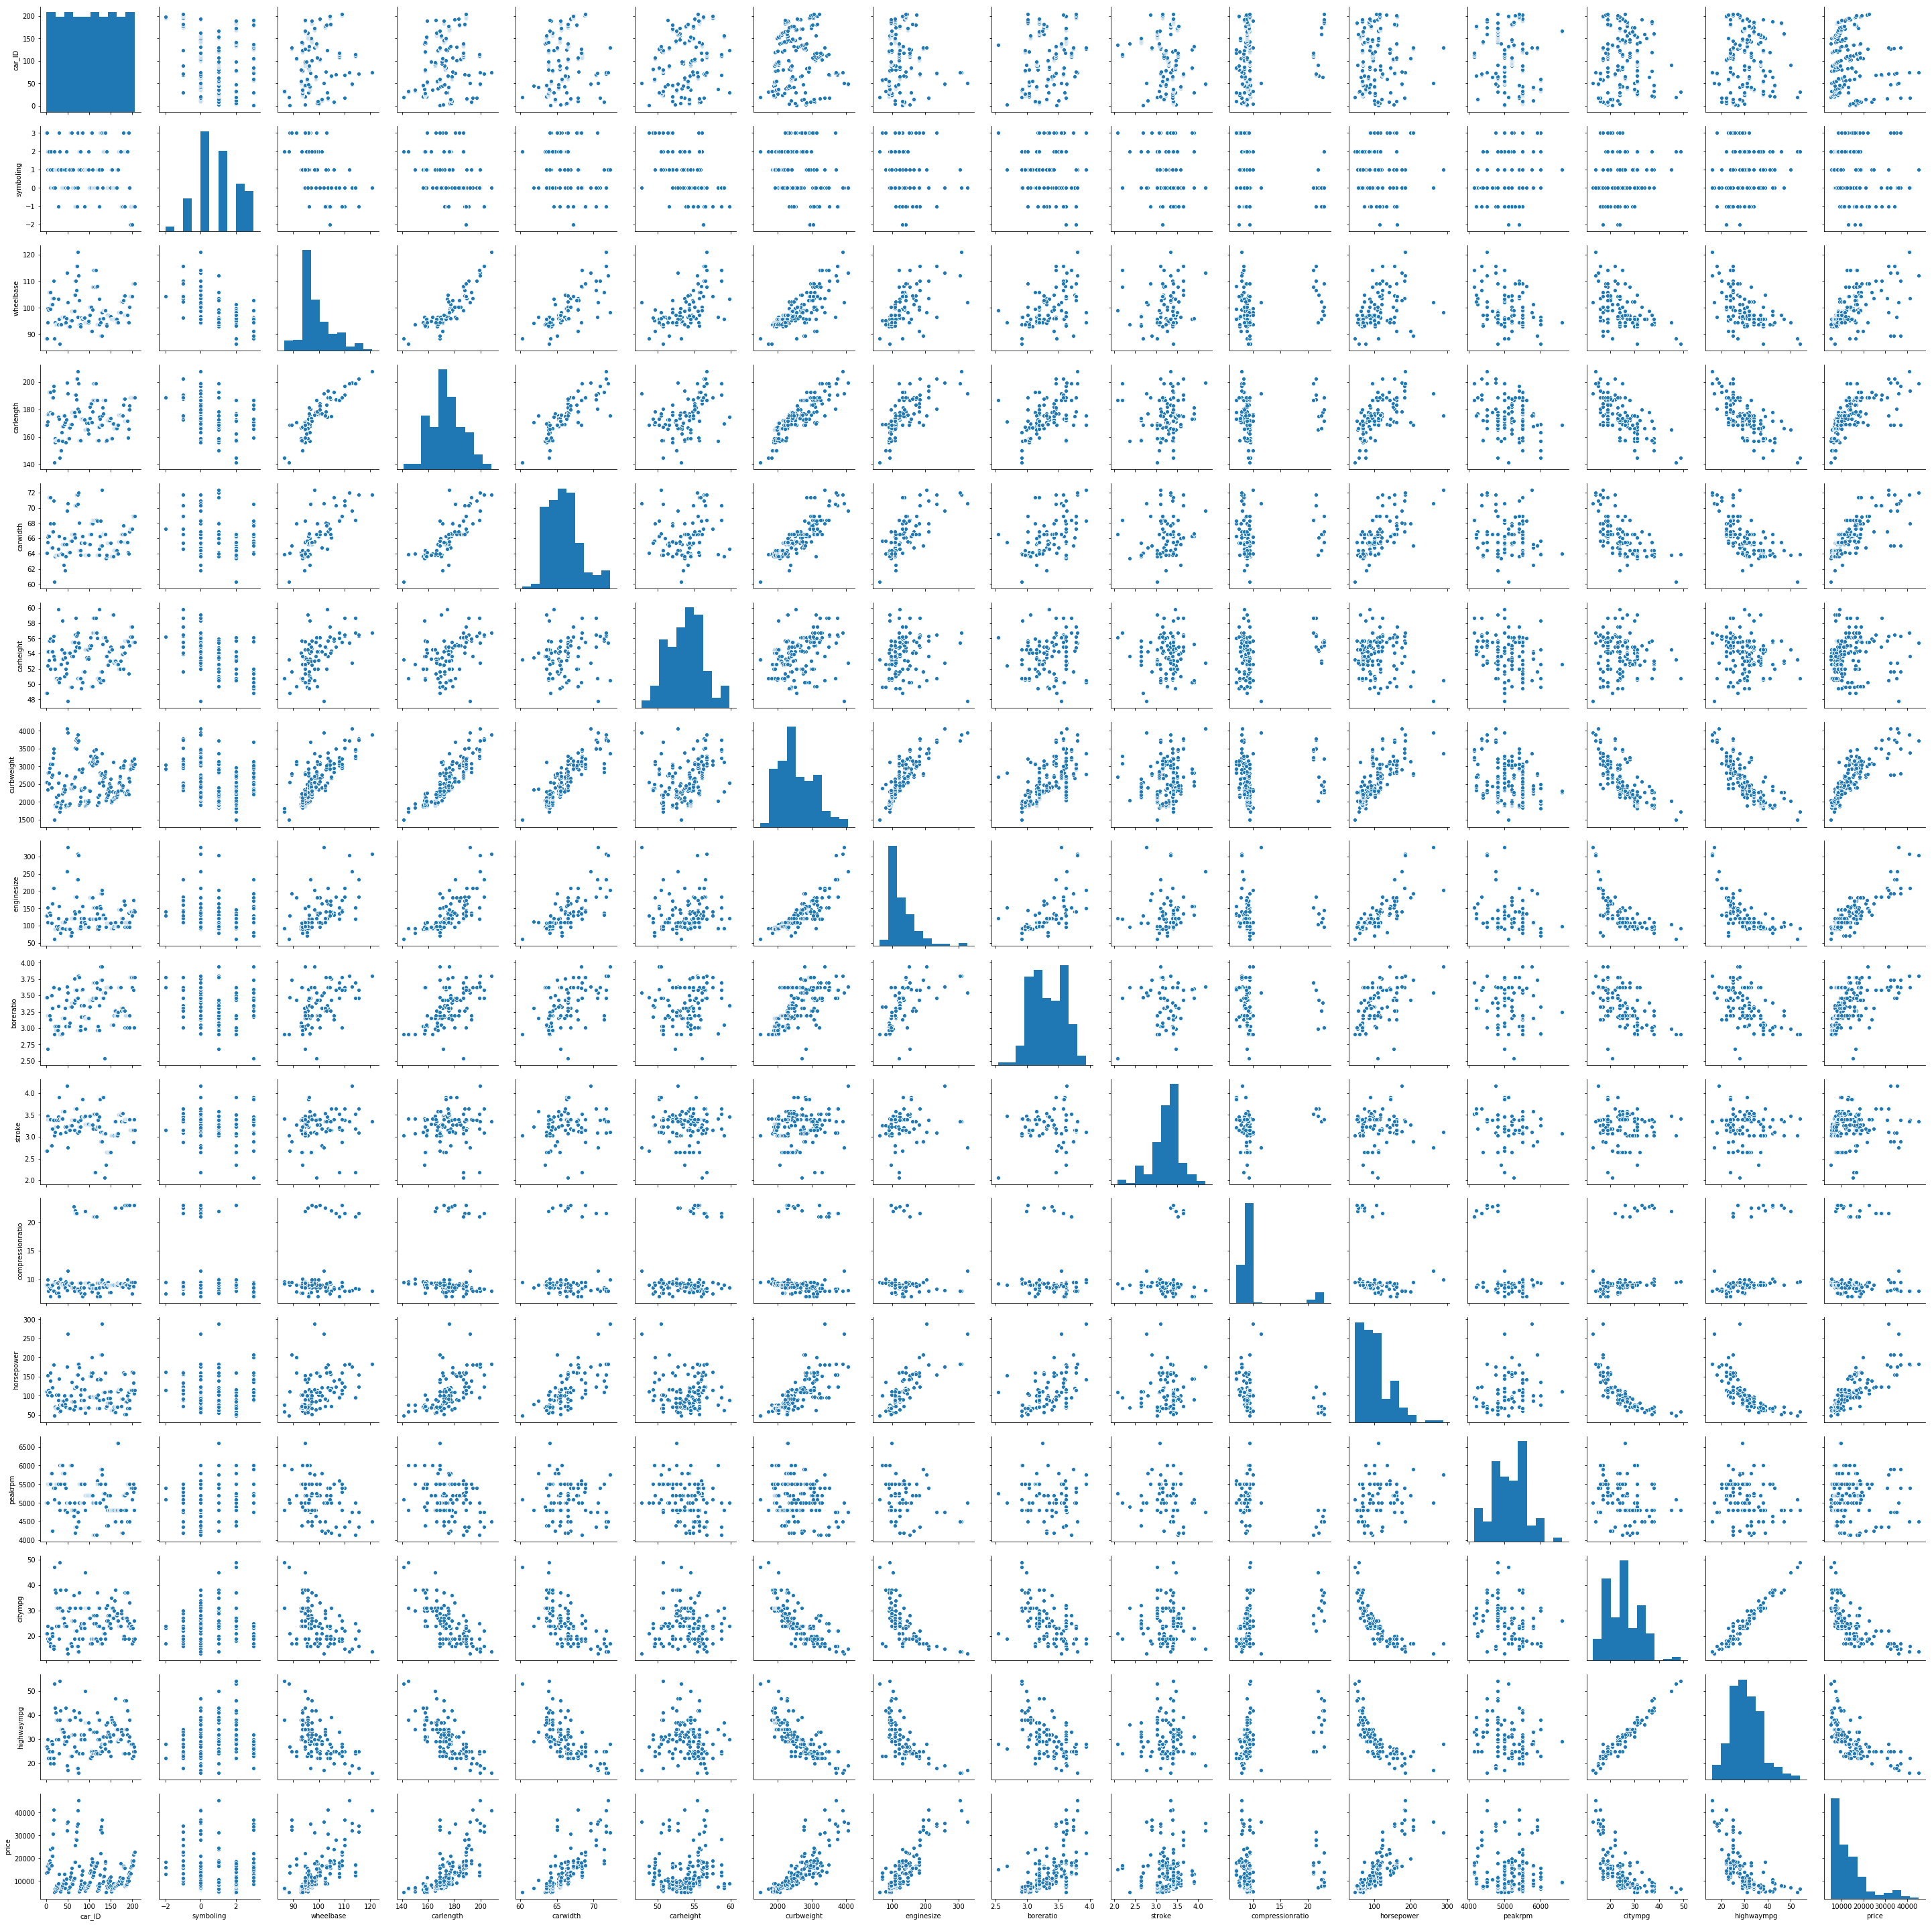

In [107]:
plt.figure(figsize = (25, 15))
sns.pairplot(cars)
plt.show()

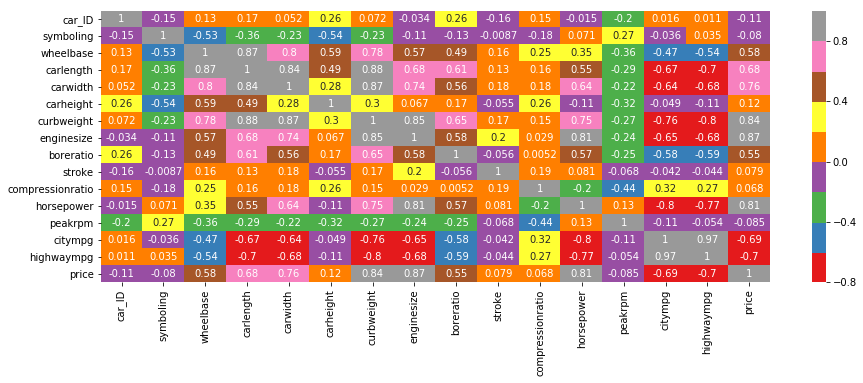

In [108]:
plt.figure(figsize = (15, 5))
sns.heatmap(cars.corr(), cmap='Set1', annot=True)
plt.show()

As from above plot and correlation matrix, we can see that ***price*** is highly correlated with ***enginesize, carweight and horsepower*** with values ***0.87, 0.84 and 0.81*** respectively.
<br>It means atleast one column has a linear relationship with price so we can apply linear regression algorithm here.

In [109]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### As from above analysis there is no missing values in the data set

In [110]:
cars['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

From above values we have found that one value of CarName is incorrect which is **audi 100ls** but is should be **audi 100 ls** so replacing incorrect values with correct ones.

In [111]:
cars.loc[cars['CarName'] == 'audi 100ls', ['CarName']] = 'audio 100 ls'

In [112]:
cars.loc[cars['CarName'] == 'audi 100ls', ['CarName']]

,CarName


As mentioned that in CarName column first part is company name and second part is Car name so we have to use only car name
and remove the company name from the data frame

In [113]:
CompanyName = cars['CarName'].apply(lambda x: x.split(' ')[0])
cars.insert(3, "CompanyName", CompanyName)
cars.drop('CarName', axis=1, inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audio,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [114]:
cars.rename(columns={'curbweight': 'carweight'}, inplace=True)
cars.set_index('car_ID', inplace= True)
cars.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,carweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audio,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [115]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'audio', 'bmw', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

From abvoe values it seems that some of the comany name have spelliing errors so correcting those spelling errors.
<br>***Fixing invalid values***
- `maxda = mazda`
- `porcshce = porsche`
- `Nissan = nissan`
- `vokswagen = volkswagen`
- `vw = volkswagen`
- `toyouta = toyota`
- `audi = audio`

In [116]:
cars['CompanyName'] = cars.CompanyName.str.lower()

In [117]:
def replace_dataframe_column_values(col, fromValue, toValue ):
    cars[col].replace(fromValue, toValue, inplace = True)

In [118]:
replace_dataframe_column_values('CompanyName', 'maxda','mazda')
replace_dataframe_column_values('CompanyName', 'porcshce','porsche')
replace_dataframe_column_values('CompanyName', 'Nissan','nissan')
replace_dataframe_column_values('CompanyName', 'vokswagen','volkswagen')
replace_dataframe_column_values('CompanyName', 'vw','volkswagen')
replace_dataframe_column_values('CompanyName', 'toyouta','toyota')
replace_dataframe_column_values('CompanyName', 'audio','audi')

In [119]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [120]:
# check for duplicate values
cars.loc[cars.duplicated()]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,carweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,


## Step 1.1: Visualizing the data

#### Function to see the visualization and distribution of the column data

In [121]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = round(y_value,2)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [122]:
def numericColumnsPlotDistribution(dataframe, col):
    fig, ax = plt.subplots(1,2, figsize =(15,5))
    sns.distplot(dataframe[col], ax=ax[0], color ='#F7522F')
    ax[0].set_title("Distribution of " + col)
    plt.subplot(1,2,2)
    sns.boxplot(y= dataframe[col], data=dataframe)
    plt.xlabel(col)
    plt.show()    

In [123]:
def categoricalColumnsPlotWithPrice(dataframe, col):
    fig, ax = plt.subplots(1,2, figsize =(15,5))
    sns.countplot(dataframe[col], ax=ax[0], color ='#F7522F')
    ax[0].set_title("Distribution of " + col)
    plt.subplot(1,2,2)
    sns.boxplot( x=dataframe[col], y= dataframe['price'], data=dataframe)
    plt.xlabel(col)
    plt.show()    

In [124]:
def categoryColumnPlotWithPrice(dataframe, col):
    fig, ax = plt.subplots(1,2, figsize =(15,5))
    ax = sns.countplot(dataframe[col], ax=ax[0], color ='#F7522F')
    ax.set_title("Distribution of " + col)
    showLabels(ax)
    #for p in ax.patches:
        #x=p.get_bbox().get_points()[:,0]
        #y=p.get_bbox().get_points()[1,1]
        #ax.annotate(y,(p.get_height()+2,p.get_y()+0.15), ha='center', va='bottom')
    plt.subplot(1,2,2)
    sns.boxplot(x=dataframe[col], y= dataframe['price'], data=dataframe)
    plt.xlabel(col)
    plt.show() 

In [125]:
def categoricalBarPlot(dataframe, numberOfCol):
    plt.figure(figsize=(35, 25))
    rows = int(len(numberOfCol))
    for idx, val in enumerate(numberOfCol, start=1):
        plt.subplot(rows, 2, idx)
        ax= dataframe[val].value_counts().plot.bar(color = sns.color_palette('husl', 16))
        ax.set(xlabel = val, ylabel = "Frequency of " + val)
        showLabels(ax)
        
    plt.show()

In [126]:
def categoryColumnPlotWithAveragePrice(dataframe, col, title, xlabel):
    dataframe = pd.DataFrame(cars.groupby([col])['price'].mean().sort_values(ascending = False))
    dataframe.plot.bar(figsize=(8,6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Average Price')
    plt.show()

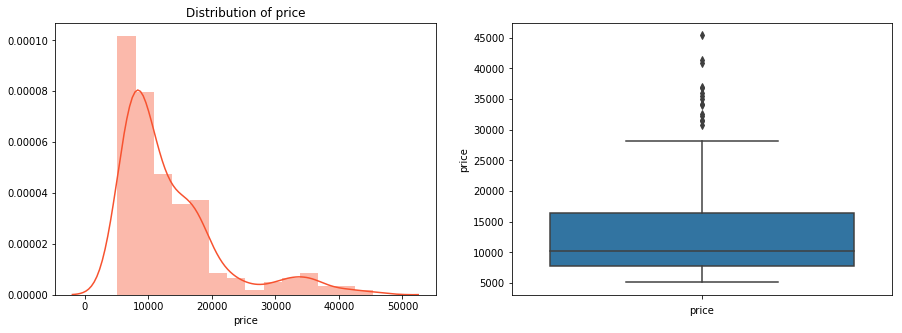

In [127]:
# visualize the distribution of the dependent variable price
numericColumnsPlotDistribution(cars, 'price')

In [128]:
print(cars['price'].describe(percentiles = [0.10, 0.15, 0.25, 0.35, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
10%       6657.000000
15%       6968.600000
25%       7788.000000
35%       8522.600000
50%      10295.000000
75%      16503.000000
80%      17493.800000
85%      18500.000000
90%      22563.000000
95%      32472.400000
max      45400.000000
Name: price, dtype: float64


#### Summary:-
- As we can see from the above distribution of the price it is showing right skewed which it have long tail.
- From analysis we can see there is much difference between mean and the median.
- Point are scatter a lot from the mean, this indicates that 85% of the cars lies inside the price of 18500 while the other   15% cars lie between 18500 to 45400.

In [129]:
cars.nunique().sort_values()

fueltype              2
aspiration            2
doornumber            2
enginelocation        2
drivewheel            3
carbody               5
symboling             6
cylindernumber        7
enginetype            7
fuelsystem            8
CompanyName          22
peakrpm              23
citympg              29
highwaympg           30
compressionratio     32
stroke               37
boreratio            38
carwidth             44
enginesize           44
carheight            49
wheelbase            53
horsepower           59
carlength            75
carweight           171
price               189
dtype: int64

As mentioned in the data dictionary and from above analysis below columns are categorical columns.

In [130]:
cars.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'carweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

- `ComapanyName`
- `symboling`
- `fueltype`	
- `aspiration`		
- `doornumber`		
- `carbody`		
- `drivewheel`		
- `enginelocation`
- `enginetype`		
- `cylindernumber`		
- `fuelsystem`

In [131]:
categoricalCols = ['CompanyName', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
                   'cylindernumber', 'fuelsystem']

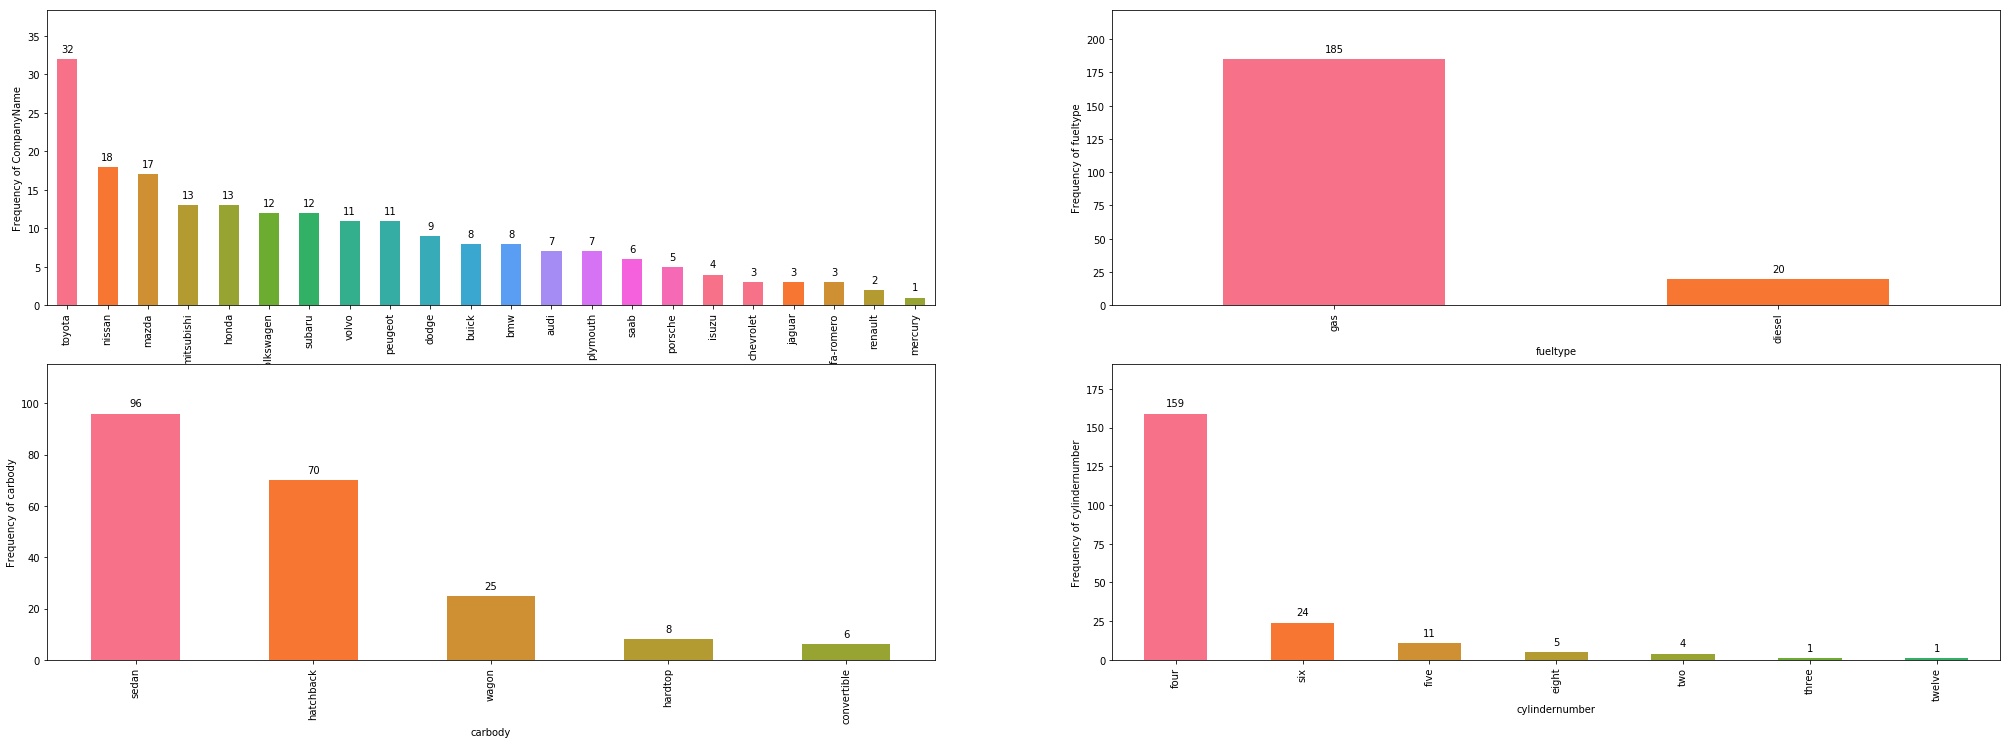

In [132]:
categoricalBarPlot(cars, ['CompanyName', 'fueltype','carbody','cylindernumber'])

### Summary
- `Toyota` seems to be favorite car is US.
- `Gas` fuel type cars more preferred than diesel.
- `sedan` car type is prefered than other type.
- Cars with `4 cylinders` are sold most.

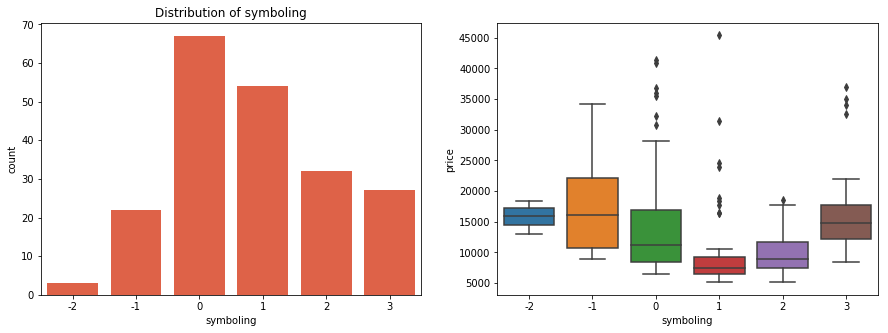

In [133]:
categoricalColumnsPlotWithPrice(cars, 'symboling')

### summary
- Most of the cars are sold between `0` and `1` symboling.
- Cars with symboling `-1` are sold with high price(as shown in the box plot) which can be understand because these cars     are safe as per the risk rating.
- Cars with `3` symboling are also have more or less same price with the cars with `-2` symboling. We need to dig deeper     regarding this because `3` symboling is risky.  

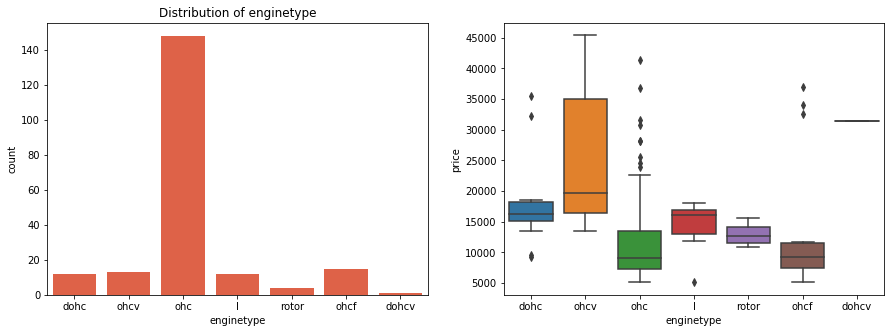

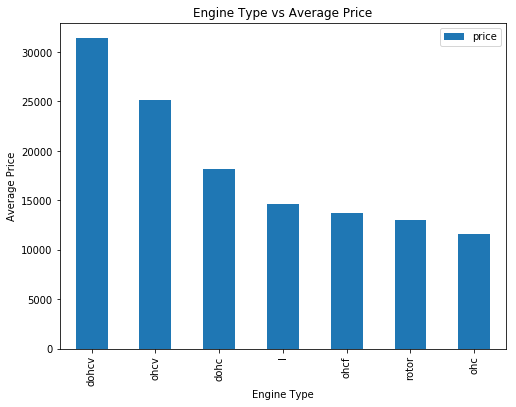

In [134]:
categoryColumnPlotWithPrice(cars, 'enginetype')
categoryColumnPlotWithAveragePrice(cars, 'enginetype', 'Engine Type vs Average Price', 'Engine Type')

### summary:-
- `ohc` engine type cars are most sold car.
- `ohcv` engine type cars have wide range of price around 17500 to 35000.
- `dohcv` engine type have only one car.
- Price of `ohc` and `ohcf` engine type car is low.

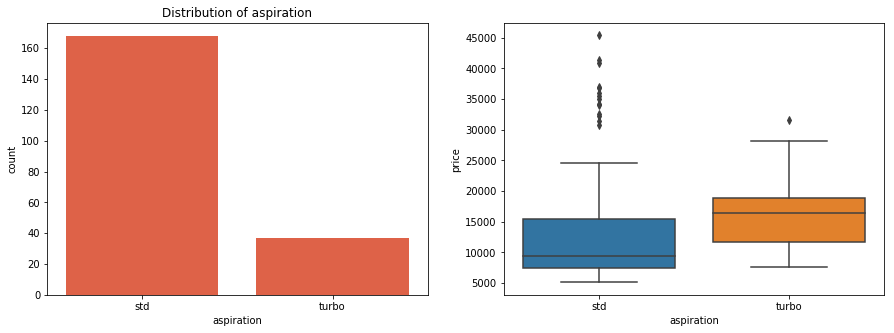

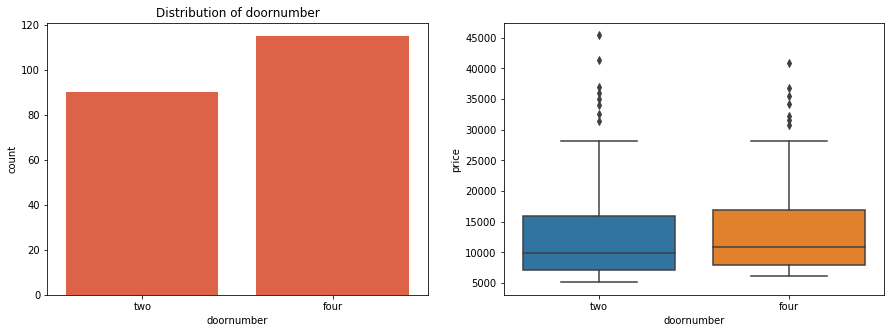

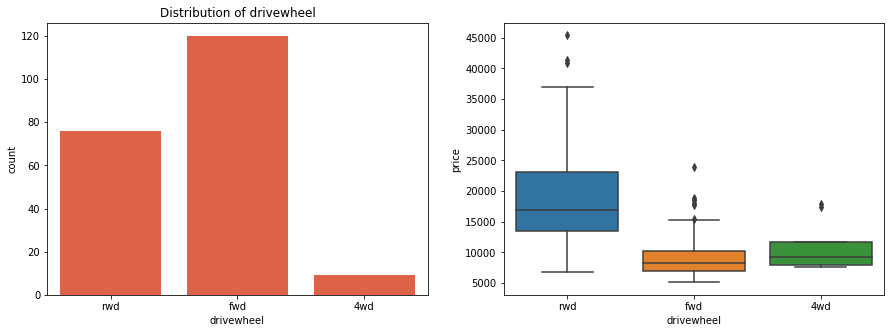

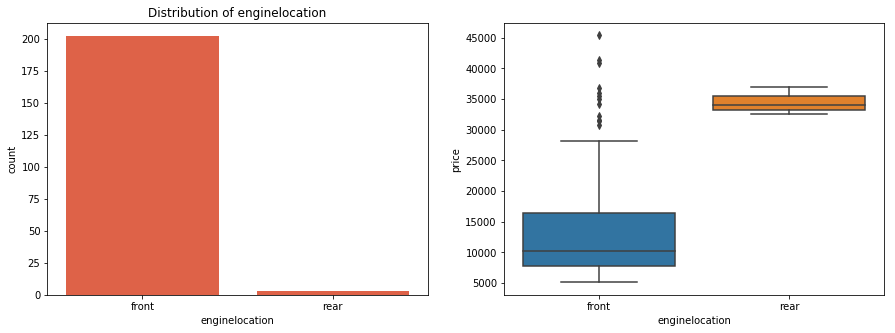

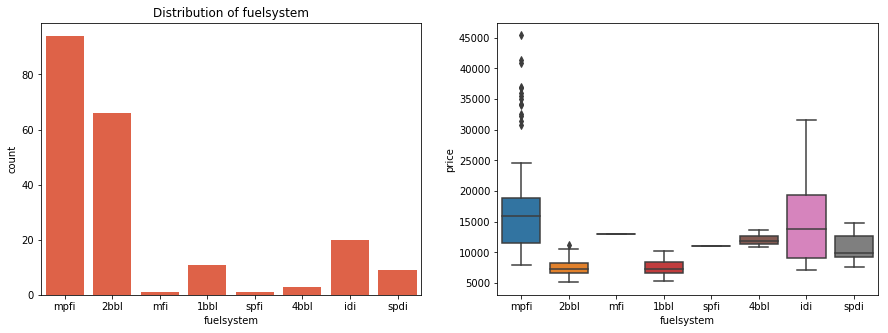

In [135]:
categoryColumnPlotWithPrice(cars, 'aspiration')
categoryColumnPlotWithPrice(cars, 'doornumber')
categoryColumnPlotWithPrice(cars, 'drivewheel')
categoryColumnPlotWithPrice(cars, 'enginelocation')
categoryColumnPlotWithPrice(cars, 'fuelsystem')

### Summary
- It seems that aspiration `turbo` has higher price than `std` aspiration and most of the car.
- ***doornumber*** column does not seems to have an impact on the price because both `2` and `4` door number car have         allmost same price.
- cars with `fwd` ***drivewheel*** have low price than other drivewheel. and these are most sold cars.
- Allmost all cars have engine at front so there is no comparison with rear engine location.
- `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range. 
   But there are few data for other categories to derive any meaningful inference

## Visualising Numerical Data

In [136]:
def scatterPlotWithPrice(dataFrame, numberOfCol):
    plt.figure(figsize=(25,20))
    rows = int(len(numberOfCol))
    for idx, val in enumerate(numberOfCol, start=1):
        plt.subplot(rows, 2, idx)
        plt.scatter(cars[val], cars['price'])
        plt.ylabel('price')
        plt.xlabel(val)
        plt.title(val + "vs Price")
    
    plt.show()

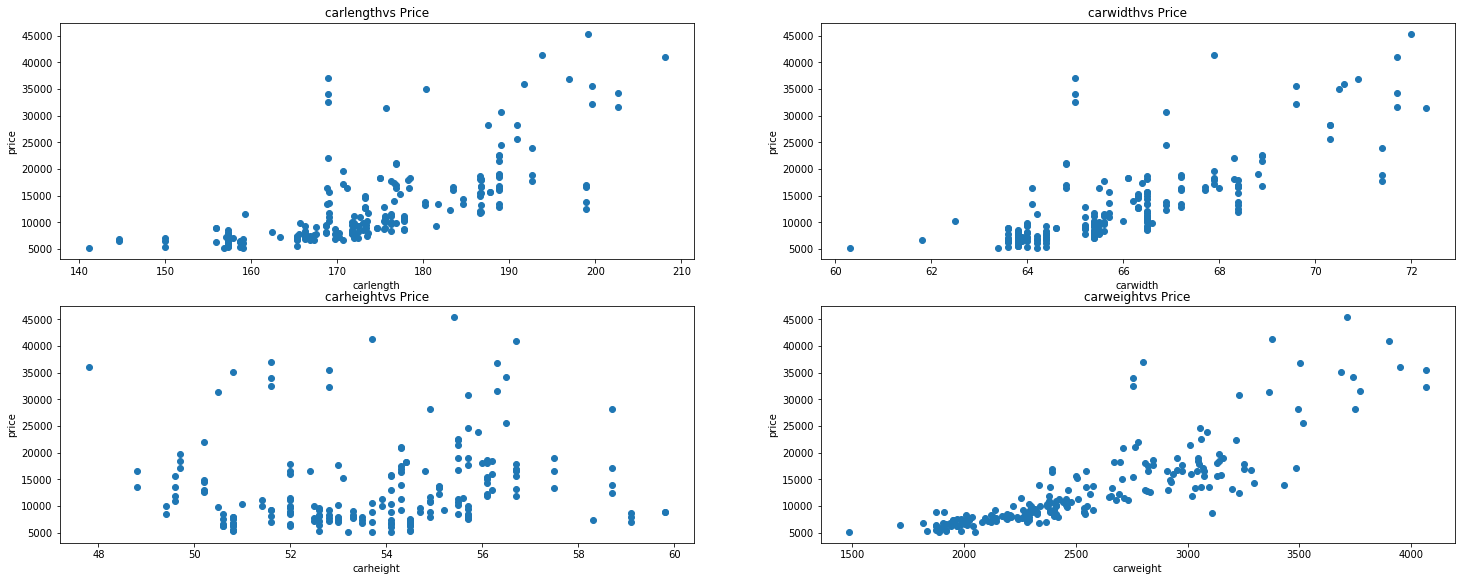

In [137]:
colList = ['carlength', 'carwidth','carheight','carweight']
scatterPlotWithPrice(cars, colList)

### Summary:
- `carlength`,`carwidth` and `carweight` shows some positive relationship with `price`.
- But `carheight` does not show any relationship with `price`.

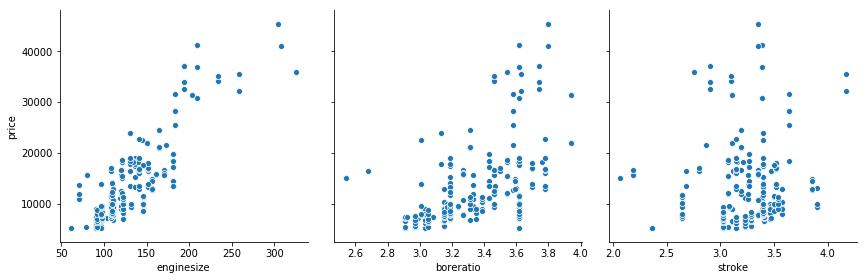

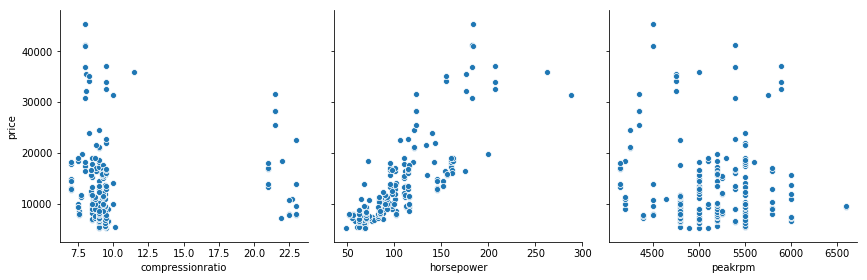

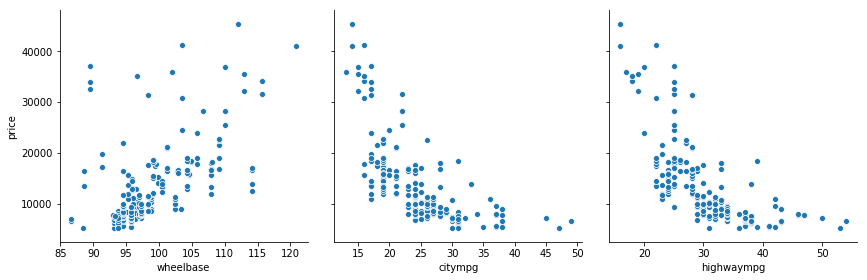

In [138]:
def PairPlotWithPrice(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

PairPlotWithPrice('enginesize', 'boreratio', 'stroke')
PairPlotWithPrice('compressionratio', 'horsepower', 'peakrpm')
PairPlotWithPrice('wheelbase', 'citympg', 'highwaympg')

### Summary:
- `enginetype`,`boreration`,`horsepower`and `wheelbase` have strong positive linear relationship with `price`.
- While `citmpg` and `highwaympg` have strong negative `price`.

In [139]:
# Check correlation coefficient between carlength and carwidth
round(np.corrcoef(cars['carlength'], cars['carwidth'])[0,1],2)

0.84

## Driving new Features

In [140]:
cars['fueleconomy'] = (0.55 * cars['citympg'] + 0.45 * cars['highwaympg'])

In [141]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp_df = cars.copy()
companyGroup_df = temp_df.groupby('CompanyName')['price'].mean()
temp_df = temp_df.merge(companyGroup_df.reset_index(), how='left', on = 'CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp_df['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,carweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


## Bivariate Analysis

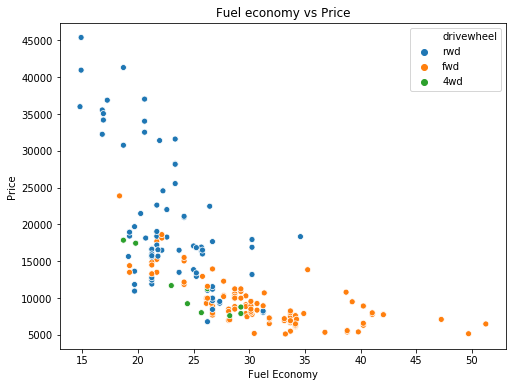

<Figure size 432x288 with 0 Axes>

In [142]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

### summary:
-`fueleconomy` has an obvios `negative correlation` with price and is significant.

<Figure size 1800x432 with 0 Axes>

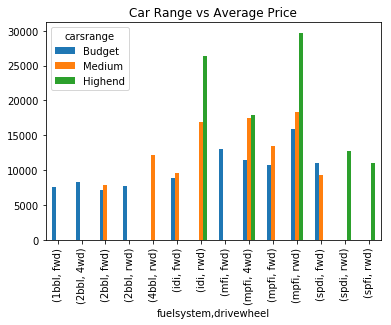

In [143]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

### summary:
- High ranged cars prefer `rwd` drivewheel with `idi` or `mpfi` fuelsystem.

In [144]:
cars.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'carweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueleconomy', 'carsrange'],
      dtype='object')

#### Below list shows the significant variables from our analysis
    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [145]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'carweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,carweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
car_ID,,,,,,,,,,,,,,,,
1,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
3,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
4,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
5,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


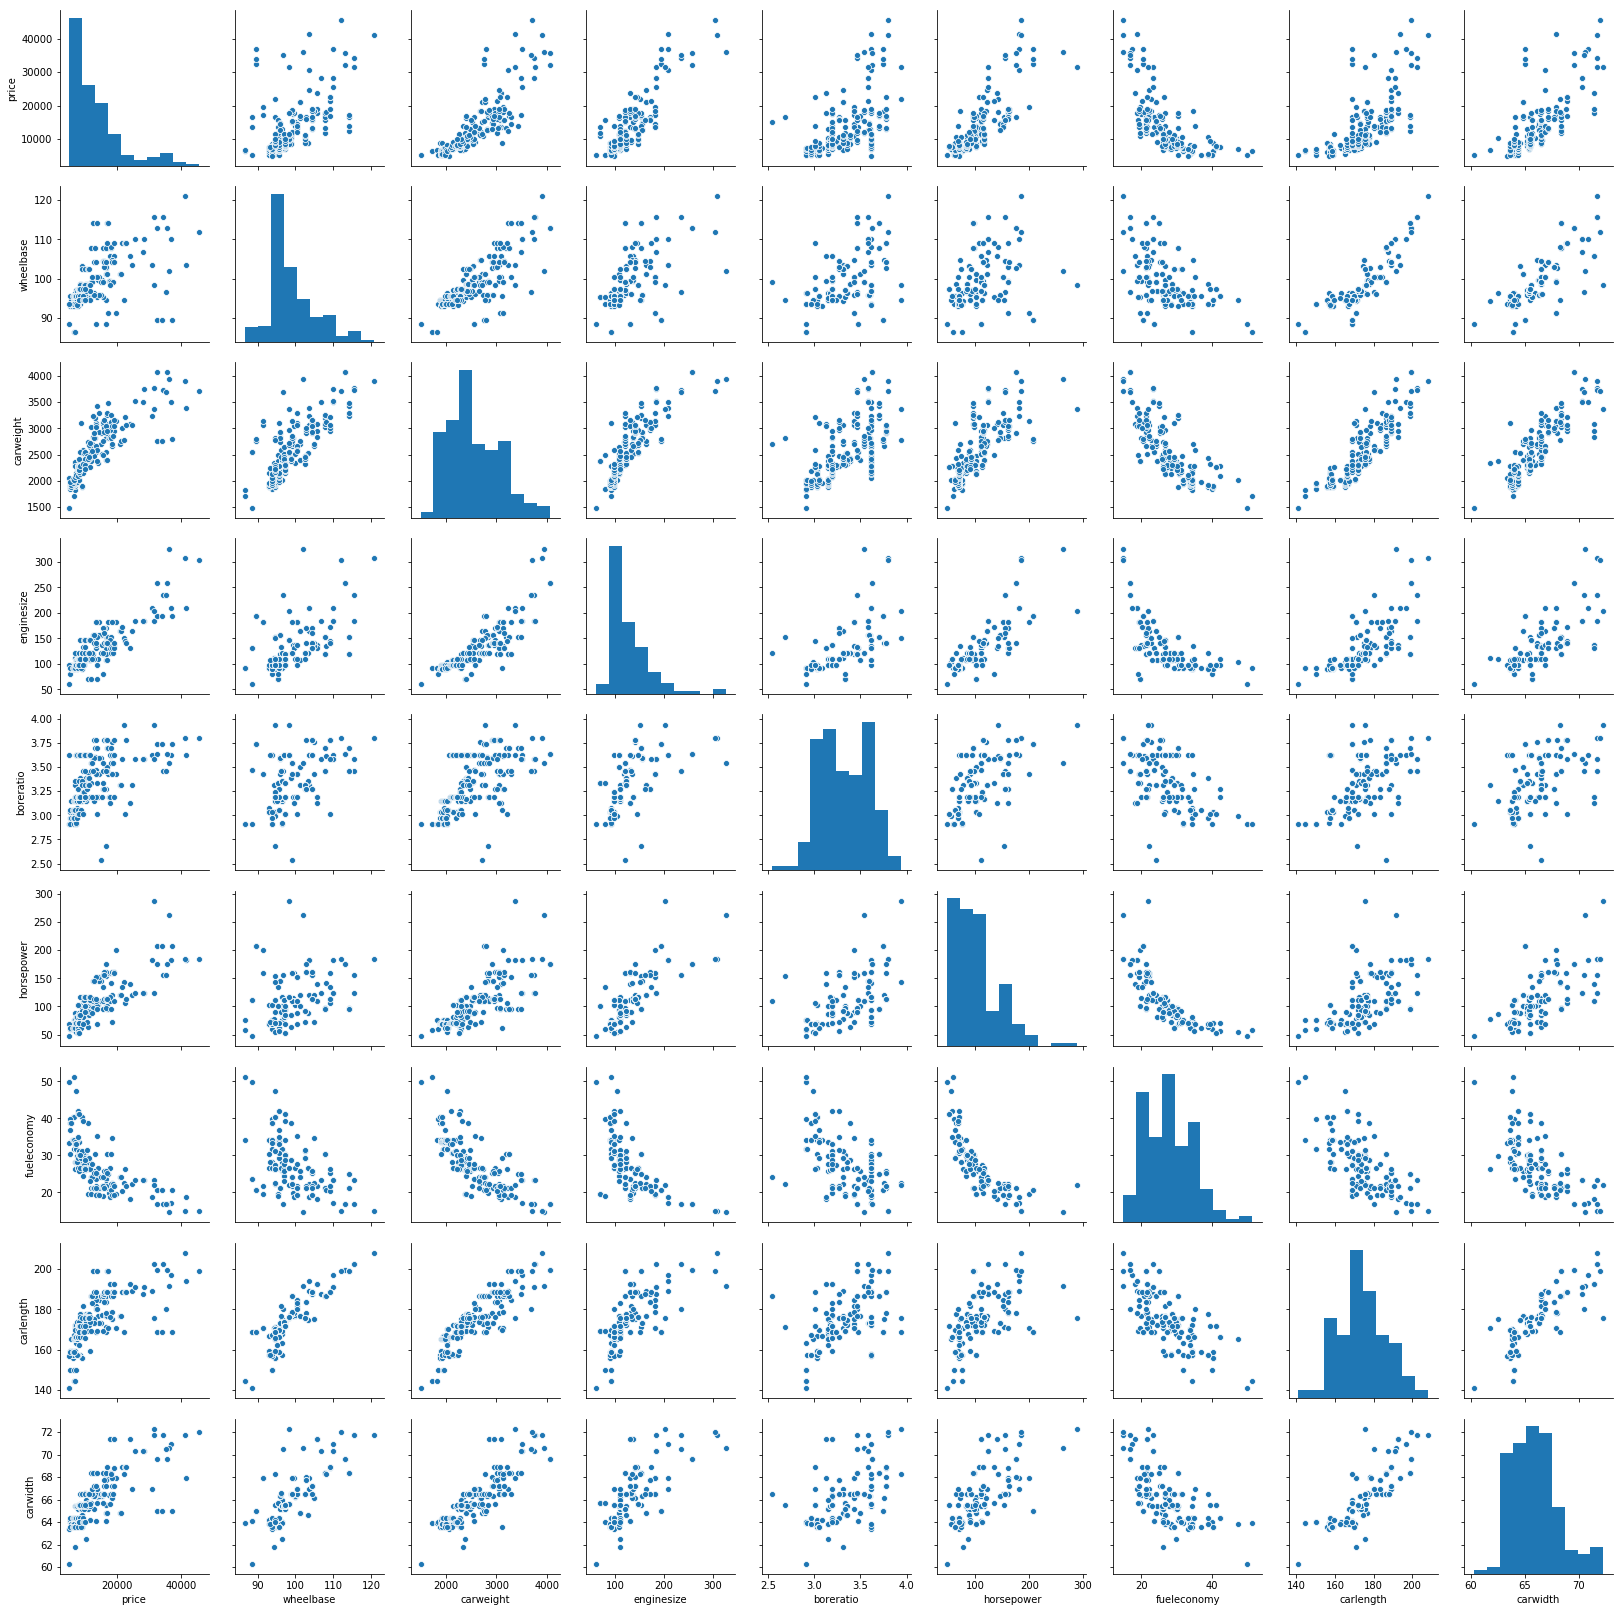

In [146]:
sns.pairplot(cars_lr)
plt.show()

## Creating Dummy Variables

In [147]:
def CreateDummies(dataFrame, colList):
    for idx, val in enumerate(colList, start=0):
        temp = pd.get_dummies(dataFrame[val], drop_first=True)
        dataFrame = pd.concat([dataFrame, temp], axis=1)
        dataFrame.drop([val], axis = 1, inplace =True)
    return dataFrame

In [148]:
colList = ['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','carsrange']
cars_lr = CreateDummies(cars_lr, colList)

In [149]:
cars_lr.head()

,price,wheelbase,carweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [150]:
cars_lr.shape

(205, 31)

## Step 2: Preparing the Model (TrainTest Split and Rescaling)

In [151]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state= 100)

In [152]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase','carweight','enginesize','boreratio','horsepower','fueleconomy','carlength','carwidth', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,wheelbase,carweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
126,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
167,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
200,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [153]:
df_train.describe()

,price,wheelbase,carweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.398601,0.111888
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.491331,0.316337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


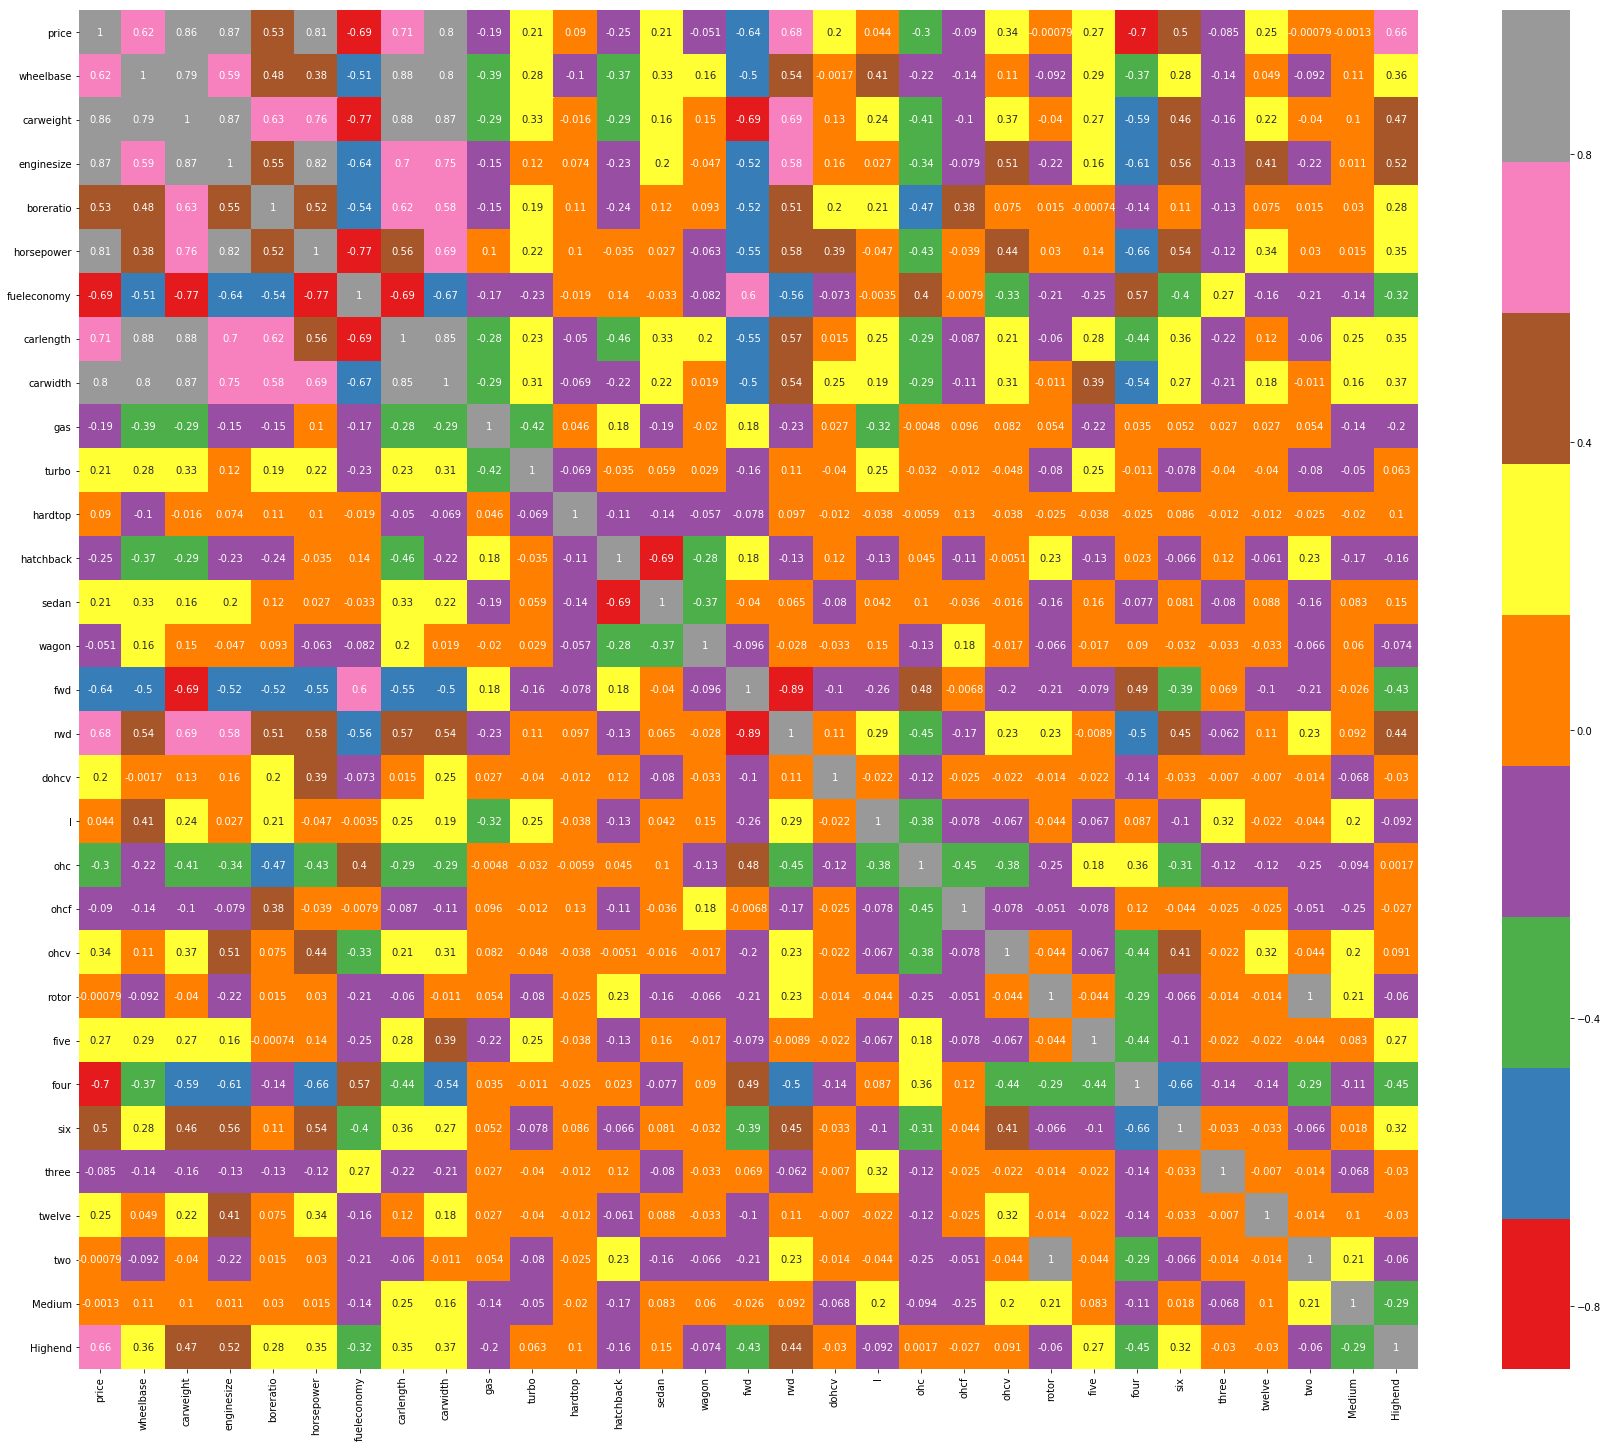

In [154]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="Set1")
plt.show()

Highly correlated variables to price are - `curbweight`, `enginesize`, `horsepower`,`carwidth` and `highend`.

In [155]:
#X_train y_train
X_train = df_train
y_train = df_train.pop('price')

In [156]:
X_train.head()

,wheelbase,carweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
126,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
167,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
200,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


## Step 3: Training the Model

In [157]:
#RFE 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [158]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, 13)
rfe = rfe.fit(X_train, y_train)

In [159]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', True, 1),
 ('carweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 2),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 14),
 ('carwidth', True, 1),
 ('gas', False, 16),
 ('turbo', False, 17),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 18),
 ('rwd', False, 9),
 ('dohcv', False, 8),
 ('l', False, 7),
 ('ohc', False, 4),
 ('ohcf', False, 3),
 ('ohcv', False, 11),
 ('rotor', True, 1),
 ('five', False, 5),
 ('four', False, 6),
 ('six', False, 10),
 ('three', True, 1),
 ('twelve', False, 13),
 ('two', False, 12),
 ('Medium', False, 15),
 ('Highend', True, 1)]

In [160]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'carweight', 'enginesize', 'horsepower', 'fueleconomy',
       'carwidth', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rotor', 'three',
       'Highend'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [161]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,carweight,enginesize,horsepower,fueleconomy,carwidth,hardtop,hatchback,sedan,wagon,rotor,three,Highend
car_ID,,,,,,,,,,,,,
123,0.244828,0.272692,0.139623,0.083333,0.530864,0.291667,0,0,1,0,0,0,0
126,0.272414,0.500388,0.339623,0.395833,0.213992,0.666667,0,1,0,0,0,0,1
167,0.272414,0.314973,0.139623,0.266667,0.344307,0.308333,0,1,0,0,0,0,0
2,0.068966,0.411171,0.260377,0.262500,0.244170,0.316667,0,0,0,0,0,0,0
200,0.610345,0.647401,0.260377,0.475000,0.122085,0.575000,0,0,0,1,0,0,0


#### Creating functions to build Model and VIF

In [162]:
# To create model
def build_OLS_Model(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    lr = sm.OLS(y_train, X_train_sm)
    lr_model = lr.fit()
    print(lr_model.summary())
    return X_train_sm

In [163]:
# Creating VIF
def get_VIF(dataframe):
    vif = pd.DataFrame()
    vif['Features'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif
    

## Model-1

In [164]:
X_train_new = build_OLS_Model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     110.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.35e-63
Time:                        00:58:15   Log-Likelihood:                 195.32
No. Observations:                 143   AIC:                            -362.6
Df Residuals:                     129   BIC:                            -321.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0850      0.049     -1.752      

p-vale of `carweight` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [165]:
X_train_new = X_train_rfe.drop('carweight', axis = 1)

## Model-2

In [166]:
X_train_new = build_OLS_Model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.50e-64
Time:                        00:58:15   Log-Likelihood:                 194.87
No. Observations:                 143   AIC:                            -363.7
Df Residuals:                     130   BIC:                            -325.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0697      0.045     -1.533      

In [167]:
get_VIF(X_train_new)

,Features,VIF
0,const,70.03
8,sedan,12.53
7,hatchback,11.06
3,horsepower,7.21
9,wagon,6.63
2,enginesize,6.59
5,carwidth,5.76
1,wheelbase,5.05
4,fueleconomy,4.09
6,hardtop,1.92


we can see that p-value of `hardtop` is `0.139` and VIF is `1.92` high p-value low VIF

In [168]:
X_train_new = X_train_new.drop('hardtop', axis = 1)

## Model-3

In [169]:
X_train_new = build_OLS_Model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     129.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.15e-64
Time:                        00:58:15   Log-Likelihood:                 193.66
No. Observations:                 143   AIC:                            -363.3
Df Residuals:                     131   BIC:                            -327.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0956      0.042     -2.266      

In [170]:
get_VIF(X_train_new)

,Features,VIF
0,const,59.76
7,sedan,7.19
3,horsepower,6.64
2,enginesize,6.46
6,hatchback,6.29
5,carwidth,5.52
1,wheelbase,4.71
8,wagon,4.17
4,fueleconomy,3.86
9,rotor,1.47


As we can see that p-value of `fueleconomy` is greates than 0.05 although VIF `3.86` but dropping because of p-values

In [171]:
X_train_new = X_train_new.drop('fueleconomy', axis=1)

## Model-4

In [172]:
X_train_new = build_OLS_Model(X_train_new, y_train)
get_VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.23e-65
Time:                        00:58:15   Log-Likelihood:                 192.71
No. Observations:                 143   AIC:                            -363.4
Df Residuals:                     132   BIC:                            -330.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0552      0.029     -1.890      0.0

,Features,VIF
0,const,28.50
6,sedan,6.91
2,enginesize,6.39
5,hatchback,6.00
4,carwidth,5.52
3,horsepower,4.54
1,wheelbase,4.32
7,wagon,4.14
10,Highend,1.46
8,rotor,1.32


p-value of `wheelbase` is `0.175` which is greater and VIF is `4.32` which ok bur dropping column due to p-value.

In [173]:
X_train_new = X_train_new.drop('wheelbase', axis= 1)

## Model-5

In [174]:
X_train_new = build_OLS_Model(X_train_new, y_train)
get_VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     155.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.35e-66
Time:                        00:58:15   Log-Likelihood:                 191.71
No. Observations:                 143   AIC:                            -363.4
Df Residuals:                     133   BIC:                            -333.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0652      0.028     -2.297      0.0

,Features,VIF
0,const,26.72
5,sedan,6.13
1,enginesize,6.08
4,hatchback,5.72
2,horsepower,3.93
6,wagon,3.54
3,carwidth,2.83
9,Highend,1.44
7,rotor,1.32
8,three,1.06


p-value of all the variables is under the 0.05 but VIF values of `sedan` `6.13` which is greater than 5 so dropping column.

In [175]:
X_train_new = X_train_new.drop('sedan', axis= 1)

## Model -6

In [176]:
X_train_new = build_OLS_Model(X_train_new, y_train)
get_VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.21e-66
Time:                        00:58:15   Log-Likelihood:                 188.94
No. Observations:                 143   AIC:                            -359.9
Df Residuals:                     134   BIC:                            -333.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1157      0.018     -6.380      0.0

,Features,VIF
0,const,10.58
1,enginesize,6.03
2,horsepower,3.88
3,carwidth,2.63
8,Highend,1.44
6,rotor,1.31
4,hatchback,1.30
5,wagon,1.12
7,three,1.06


p-value of `wagon` is greater than 0.05 so dropping column.

In [177]:
X_train_new = X_train_new.drop('wagon', axis= 1)

## Model 7

In [178]:
X_train_new = build_OLS_Model(X_train_new, y_train)
get_VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     193.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.37e-67
Time:                        00:58:15   Log-Likelihood:                 188.50
No. Observations:                 143   AIC:                            -361.0
Df Residuals:                     135   BIC:                            -337.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1193      0.018     -6.734      0.0

,Features,VIF
0,const,10.10
1,enginesize,5.98
2,horsepower,3.88
3,carwidth,2.62
7,Highend,1.43
5,rotor,1.31
4,hatchback,1.19
6,three,1.06


p-value of `enginesize` column is under the threshold but VIF value is greater than 5 so dropping column.

In [179]:
X_train_new = X_train_new.drop('enginesize', axis= 1)

## Model 9

In [180]:
X_train_new = build_OLS_Model(X_train_new, y_train)
get_VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     198.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.17e-64
Time:                        00:58:15   Log-Likelihood:                 179.70
No. Observations:                 143   AIC:                            -345.4
Df Residuals:                     136   BIC:                            -324.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1133      0.019     -6.058      0.0

,Features,VIF
0,const,10.03
2,carwidth,2.15
1,horsepower,1.99
6,Highend,1.20
3,hatchback,1.16
4,rotor,1.06
5,three,1.06


p-value of `rotor` is greater than 0.05 so dropping column.

In [181]:
X_train_new = X_train_new.drop('rotor', axis= 1)

## Model 10

In [182]:
X_train_new = build_OLS_Model(X_train_new, y_train)
get_VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     235.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.90e-65
Time:                        00:58:15   Log-Likelihood:                 178.68
No. Observations:                 143   AIC:                            -345.4
Df Residuals:                     137   BIC:                            -327.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1142      0.019     -6.090      0.0

,Features,VIF
0,const,10.02
2,carwidth,2.15
1,horsepower,1.99
5,Highend,1.20
3,hatchback,1.10
4,three,1.06


## Model 11

In [183]:
# dropping three to see the change in model statistics
X_train_new = X_train_new.drop('three', axis= 1)
X_train_new = build_OLS_Model(X_train_new, y_train)
get_VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     285.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.23e-65
Time:                        00:58:15   Log-Likelihood:                 176.11
No. Observations:                 143   AIC:                            -342.2
Df Residuals:                     138   BIC:                            -327.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1066      0.019     -5.696      0.0

,Features,VIF
0,const,9.69
2,carwidth,2.09
1,horsepower,1.99
4,Highend,1.20
3,hatchback,1.10


## Step 4: Residual Analysis
### Assumption :- 
- Error term are normally distributed
- A histogram of the error terms is plotted to check if the error terms are normally distributed.
- While the histogram tells you whether the error terms are normally distributed or not, 
it also helps you check if they are centred around zero which is quite crucial.

In [184]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

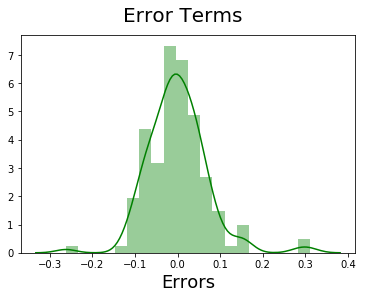

In [185]:
residual = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20, color='g')
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

We can see that ***error terms are normally distributed and its mean is zero*** so it is fulfilling the asumption.

In [186]:
residual = np.reshape(residual, -1, 2)
X_train_new.shape

(143, 5)

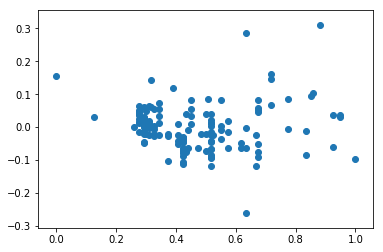

In [187]:
# looking for the patterns in residuals (we should not able to see any pattern)
plt.figure()
plt.scatter(X_train_new['carwidth'], residual)
plt.show()

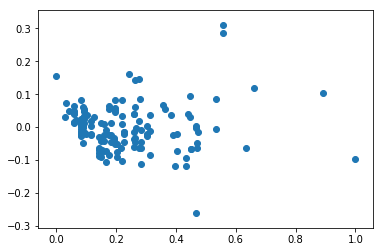

In [188]:
# looking for the patterns in residuals (we should not able to see any pattern)
plt.figure()
plt.scatter(X_train_new['horsepower'], residual)
plt.show()

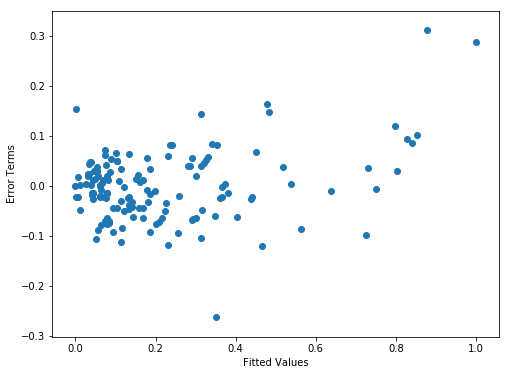

In [189]:
residual_train = y_train - y_train_pred
plt.figure(figsize= (8,6))
plt.scatter(y_train, residual_train, cmap='b')
plt.xlabel("Fitted Values")
plt.ylabel("Error Terms")
plt.show()

## Step 4: Prediction and Evaluation on Test Data Set

In [190]:
#Scaling the test set
num_vars = ['wheelbase', 'carweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,wheelbase,carweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
161,0.072382,0.313793,0.235066,0.139623,0.404762,0.091667,0.747599,0.409756,0.341667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
187,0.093295,0.368966,0.305275,0.181132,0.404762,0.154167,0.421125,0.497561,0.433333,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
60,0.102964,0.420690,0.347944,0.230189,0.563492,0.150000,0.381344,0.596748,0.516667,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
166,0.115479,0.272414,0.301396,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
141,0.068652,0.231034,0.291699,0.177358,0.746032,0.104167,0.368999,0.263415,0.291667,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [191]:
df_test.describe()

,price,wheelbase,carweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.000000
mean,0.239439,0.437764,0.428470,0.265673,0.556580,0.248858,0.344661,0.559481,0.480376,0.887097,0.177419,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.451613,0.129032
std,0.233076,0.212861,0.179488,0.162820,0.228484,0.163376,0.175037,0.189947,0.165440,0.319058,0.385142,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.501716,0.337972
min,0.007763,0.000000,0.128394,0.067925,-0.111111,0.016667,0.002743,0.056911,0.183333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.092342,0.313793,0.305275,0.177358,0.404762,0.107292,0.192387,0.459350,0.358333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.158991,0.387931,0.406129,0.226415,0.563492,0.218750,0.326475,0.547967,0.441667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,0.317243,0.570690,0.564876,0.316038,0.746032,0.295833,0.451303,0.719919,0.516667,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000
max,1.112855,1.182759,0.935609,0.932075,0.888889,0.662500,0.747599,1.089431,0.975000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


In [192]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [193]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# add a constant
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [194]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

#### Evaluation of test via Comparision between y_test_pred and y_test

In [195]:
r2_score(y_test, y_test_pred)

0.8098069126090583

Text(0, 0.5, 'y_test_pred')

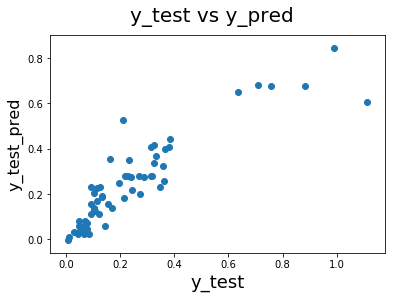

In [196]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)  

In [197]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     285.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.23e-65
Time:                        00:58:17   Log-Likelihood:                 176.11
No. Observations:                 143   AIC:                            -342.2
Df Residuals:                     138   BIC:                            -327.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1066      0.019     -5.696      0.0

### Result:-
1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.892 and 0.889 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 285.1 and 1.23e-65(approx. 0.0) - Model fir is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

### Model equation -:

*price = -0.1066 + (0.5821 x horsepower) + (0.3942 x carwidth) - (0.0464 x hatchback) + (0.2456 x Highend)*